In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
# Open the dataset
df = pd.read_csv("Transportation_Network_Providers_-_Trips__2018_-_2022_ (1).csv", parse_dates=['Trip Start Timestamp', 'Trip End Timestamp'])

# Show the first five rows of the dataset
pd.set_option('display.max_columns',None)
df.head()

/tmp/ipykernel_7272/1697506806.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv("Transportation_Network_Providers_-_Trips__2018_-_2022_ (1).csv", parse_dates=['Trip Start Timestamp', 'Trip End Timestamp'])


,Trip ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,Fare,Tip,Additional Charges,Trip Total,Shared Trip Authorized,Trips Pooled,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,0023918a32baa84c59a60ec6acd38ef8d8876a55,2022-01-01,2022-01-01 00:45:00,2123,27.8,NaN,NaN,8.0,NaN,37.5,0,7.91,45.41,False,1,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),NaN,NaN,NaN
1,0031f13d0144700e8132ec4ced74bf91b604bafd,2022-01-01,2022-01-01 00:00:00,308,1.4,1.703107e+10,1.703108e+10,7.0,8.0,5.0,0,3.75,8.75,False,1,41.922083,-87.634156,POINT (-87.6341560931 41.922082541),41.907413,-87.640902,POINT (-87.6409015248 41.9074128162)
2,003b7701b5658afe3415169d091130f15c2d8434,2022-01-01,2022-01-01 00:15:00,830,3.6,1.703108e+10,1.703122e+10,8.0,22.0,10.0,0,1.02,11.02,False,1,41.907492,-87.635760,POINT (-87.6357600901 41.9074919303),41.920802,-87.694532,POINT (-87.6945323419 41.9208017043)
3,003c710f7464bf348349ec4436fea275b97300bd,2022-01-01,2022-01-01 00:15:00,862,4.7,1.703122e+10,1.703108e+10,22.0,8.0,10.0,0,3.74,13.74,False,1,41.915910,-87.683826,POINT (-87.6838259399 41.9159097884),41.893216,-87.637844,POINT (-87.6378442095 41.8932163595)
4,0066f1154bb7dc467b2d8ce59e8def475a428557,2022-01-01,2022-01-01 00:00:00,471,0.7,1.703108e+10,1.703108e+10,8.0,8.0,2.5,0,2.36,4.86,False,1,41.892073,-87.628874,POINT (-87.6288741572 41.8920726347),41.893216,-87.637844,POINT (-87.6378442095 41.8932163595)


In [21]:
columns_of_interest = ['Trip Start Timestamp', 'Trip Seconds',
       'Trip Miles', 'Fare', 'Tip', 'Additional Charges', 'Trip Total', 'Shared Trip Authorized',
       'Trips Pooled', 'Pickup Centroid Latitude', 'Pickup Centroid Longitude', 'Dropoff Centroid Latitude',
       'Dropoff Centroid Longitude']

df = df[columns_of_interest]

# Rename all the columns to not include whitespace
df = df.rename(columns={i: "_".join(i.split(" ")).lower() for i in df.columns})

# Check the info on the cleaned-up dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1528 entries, 0 to 1527
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   trip_start_timestamp        1528 non-null   datetime64[ns]
 1   trip_seconds                1528 non-null   int64         
 2   trip_miles                  1528 non-null   float64       
 3   fare                        1528 non-null   float64       
 4   tip                         1528 non-null   int64         
 5   additional_charges          1528 non-null   float64       
 6   trip_total                  1528 non-null   float64       
 7   shared_trip_authorized      1528 non-null   bool          
 8   trips_pooled                1528 non-null   int64         
 9   pickup_centroid_latitude    1450 non-null   float64       
 10  pickup_centroid_longitude   1450 non-null   float64       
 11  dropoff_centroid_latitude   1412 non-null   float64     

In [22]:
for i in df.columns:
    print(i)

trip_start_timestamp
trip_seconds
trip_miles
fare
tip
additional_charges
trip_total
shared_trip_authorized
trips_pooled
pickup_centroid_latitude
pickup_centroid_longitude
dropoff_centroid_latitude
dropoff_centroid_longitude


In [39]:
df['date'] = pd.to_datetime(df['trip_start_timestamp'].dt.date)

In [40]:
df.head()

,trip_start_timestamp,trip_seconds,trip_miles,fare,tip,additional_charges,trip_total,shared_trip_authorized,trips_pooled,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude,date
0,2022-01-01,2123,27.8,37.5,0,7.91,45.41,False,1,41.899602,-87.633308,NaN,NaN,2022-01-01
1,2022-01-01,308,1.4,5.0,0,3.75,8.75,False,1,41.922083,-87.634156,41.907413,-87.640902,2022-01-01
2,2022-01-01,830,3.6,10.0,0,1.02,11.02,False,1,41.907492,-87.635760,41.920802,-87.694532,2022-01-01
3,2022-01-01,862,4.7,10.0,0,3.74,13.74,False,1,41.915910,-87.683826,41.893216,-87.637844,2022-01-01
4,2022-01-01,471,0.7,2.5,0,2.36,4.86,False,1,41.892073,-87.628874,41.893216,-87.637844,2022-01-01


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1528 entries, 0 to 1527
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   trip_start_timestamp        1528 non-null   datetime64[ns]
 1   trip_seconds                1528 non-null   int64         
 2   trip_miles                  1528 non-null   float64       
 3   fare                        1528 non-null   float64       
 4   tip                         1528 non-null   int64         
 5   additional_charges          1528 non-null   float64       
 6   trip_total                  1528 non-null   float64       
 7   shared_trip_authorized      1528 non-null   bool          
 8   trips_pooled                1528 non-null   int64         
 9   pickup_centroid_latitude    1450 non-null   float64       
 10  pickup_centroid_longitude   1450 non-null   float64       
 11  dropoff_centroid_latitude   1412 non-null   float64     

In [42]:
df['date'].unique()

<DatetimeArray>
['2022-01-01 00:00:00']
Length: 1, dtype: datetime64[ns]

array([[<Axes: title={'center': 'date'}>]], dtype=object)

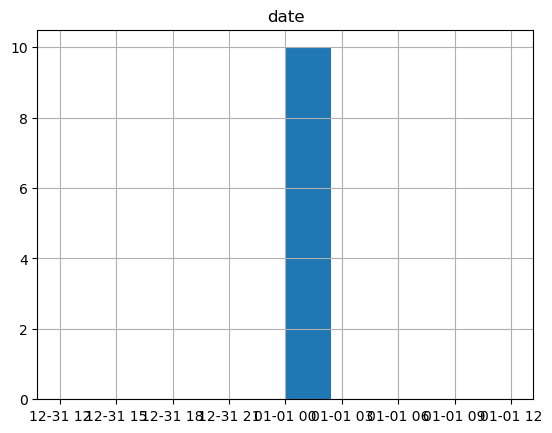

In [43]:
# Select the column which you want to plot.
column_to_plot = 'date'

# Plot the histogram of the desired column
df.hist(column_to_plot, density=True)

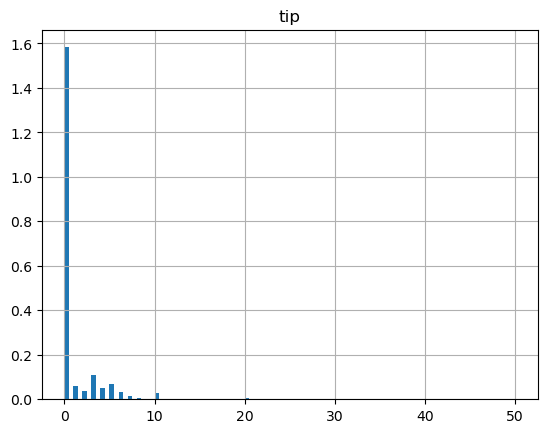

In [44]:
# Select the column which you want to plot.
column_to_plot = 'tip'

# Plot the histogram of the desired column
df.hist(column_to_plot, density=True, bins = 100);

In [45]:
# Create a boolean series that distinguishes between tippers and no-tippers
tippers = df['tip'] > 0
# Count the number of tippers
number_of_tippers = tippers.sum()
# Count the total number of rides
total_rides = len(df)

# Calculate the fraction of people who tip
fraction_of_tippers = number_of_tippers / total_rides
print(f'The percentage of riders who tip is {fraction_of_tippers*100:.0f}%.')

The percentage of riders who tip is 21%.


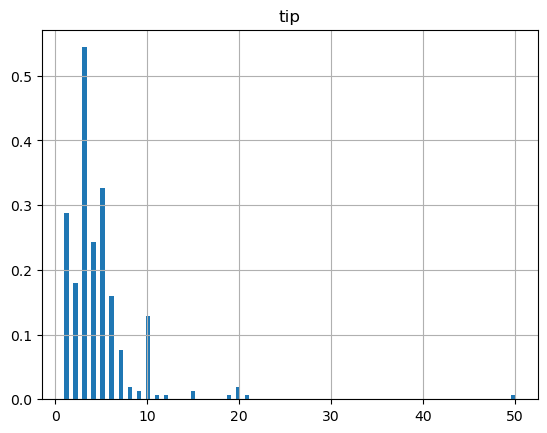

In [46]:
# Create a dataframe That only consists of tippers (conditioned on the boolean series)
df_tippers = df[tippers]

# Now re-plot the above histogram, but only for tippers
df_tippers.hist('tip', density=True, bins = 100);

In [47]:
# Extracting the day of the week is simple when you have it in datetime format.
df['weekday'] = df["date"].dt.day_name()

df.head()

,trip_start_timestamp,trip_seconds,trip_miles,fare,tip,additional_charges,trip_total,shared_trip_authorized,trips_pooled,pickup_centroid_latitude,pickup_centroid_longitude,dropoff_centroid_latitude,dropoff_centroid_longitude,date,weekday
0,2022-01-01,2123,27.8,37.5,0,7.91,45.41,False,1,41.899602,-87.633308,NaN,NaN,2022-01-01,Saturday
1,2022-01-01,308,1.4,5.0,0,3.75,8.75,False,1,41.922083,-87.634156,41.907413,-87.640902,2022-01-01,Saturday
2,2022-01-01,830,3.6,10.0,0,1.02,11.02,False,1,41.907492,-87.635760,41.920802,-87.694532,2022-01-01,Saturday
3,2022-01-01,862,4.7,10.0,0,3.74,13.74,False,1,41.915910,-87.683826,41.893216,-87.637844,2022-01-01,Saturday
4,2022-01-01,471,0.7,2.5,0,2.36,4.86,False,1,41.892073,-87.628874,41.893216,-87.637844,2022-01-01,Saturday


In [49]:
df['weekday'].unique()

array(['Saturday'], dtype=object)